In [1]:
import os
import json
import random

import cv2
import numpy as np
from ultralytics import YOLO
import torch
%matplotlib inline
import matplotlib.pyplot as plt
import utils

In [2]:
# TODO
# Transfer Learning
# Learning Methods
# Data Augmentation
# Model Training
# Model Evaluation
# Weights & Biases
# Model Inference

In [ ]:
### TRAIN VAL TEST SPLIT ###
# base_dir = "data/annotations/lozenge_yolo"
# images_dir = os.path.join(base_dir, "images")
# labels_dir = os.path.join(base_dir, "labels")

# utils.train_val_test_split(images_dir, labels_dir)

In [55]:
### INIT ###
model = YOLO("yolo11n.pt")

In [ ]:
### TRAINING ###
# TODO: Train Metrics
model.train(
    data="data/annotations/lozenge_yolo/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    optimizer="Adam",
    lr0=0.001,
    lrf=0.2,
    momentum=0.937,
    device="cuda"
)

In [2]:
### LOAD ###
best_model = "models/yolo_detector_lozenge/best.pt"
model = YOLO(best_model)

In [3]:
### VAL ###
metrics = model.val(data="data/annotations/lozenge_yolo/data.yaml", split="val")
print(metrics)

Ultralytics 8.3.75 🚀 Python-3.10.12 torch-2.6.0+cu118 CUDA:0 (Tesla T4, 15934MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /home/azureuser/projects/object_detection/data/annotations/lozenge_yolo/labels/val.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


                   all         40         46      0.999          1      0.995      0.991
Speed: 1.0ms preprocess, 8.3ms inference, 0.0ms loss, 13.6ms postprocess per image
Results saved to /home/azureuser/projects/object_detection/runs/detect/val6
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ac30f71bb20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.

In [66]:
### TEST ###
metrics = model.val(data="data/annotations/lozenge_yolo/data.yaml", split="test")
print(metrics)

Ultralytics 8.3.75 🚀 Python-3.10.12 torch-2.6.0+cu118 CUDA:0 (Tesla T4, 15934MiB)


val: Scanning /home/azureuser/projects/object_detection/data/annotations/lozenge_yolo/labels/test... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<00:00, 1848.18it/s]

val: New cache created: /home/azureuser/projects/object_detection/data/annotations/lozenge_yolo/labels/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


                   all         21         25      0.998          1      0.995      0.995
Speed: 1.3ms preprocess, 15.0ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /home/azureuser/projects/object_detection/runs/detect/val5
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7de94a201210>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.

In [88]:
### INF ###
DECISION_THRESHOLD = 0.5

image_dir = "data/annotations/lozenge/images"
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]

test_image = os.path.join(image_dir, random.choice(image_files))
image = cv2.imread(test_image)

results = model.predict(image, save=True, conf=DECISION_THRESHOLD)


0: 640x384 1 nectar_price_lozenge, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)
Results saved to /home/azureuser/projects/object_detection/runs/detect/predict2


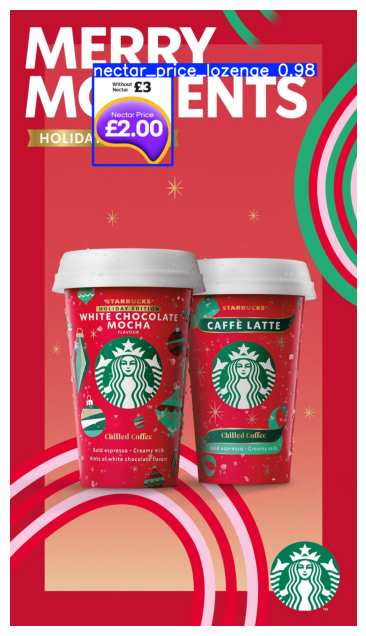

Detected object with confidence: 0.98


In [ ]:
plt.figure(figsize=(12, 8))

result = results[0]

im_array = result.plot()
plt.imshow(cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

for box in result.boxes:
    print(f"Detected object with confidence: {box.conf.item():.2f}")

In [92]:
### EXPORT ###
model_dir = "models/lozenge_detector"
os.makedirs(model_dir, exist_ok=True)

model.export(
    format="onnx", 
    imgsz=640,
    save=True,
    save_dir=model_dir,
    opset=11
)

Ultralytics 8.3.75 🚀 Python-3.10.12 torch-2.6.0+cu118 CPU (AMD EPYC 7V12 64-Core Processor)

PyTorch: starting from 'runs/detect/train14/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.2 MB)

ONNX: starting export with onnx 1.17.0 opset 11...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 0.9s, saved as 'runs/detect/train14/weights/best.onnx' (10.1 MB)

Export complete (1.1s)
Results saved to /home/azureuser/projects/object_detection/runs/detect/train14/weights
Predict:         yolo predict task=detect model=runs/detect/train14/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train14/weights/best.onnx imgsz=640 data=data/annotations/lozenge_yolo/data.yaml  
Visualize:       https://netron.app


'runs/detect/train14/weights/best.onnx'